## 分析过程
### 一、数据清洗
#### 重复值、异常值、格式调整
#### 异常值处理
### 数据规整
#### 比如增加一列辅助列 月份

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'## 设置中文显示

In [2]:
data = pd.read_csv('data_wuliu.csv',encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


##### 通过info()可以看出，该数据集有10列，1161行数据，包括名字，数据量，格式等，可以得出：
##### 1.订单号，货品交货情况，数量三列数据:存在缺失值，但是缺失量不大，可以删除
##### 2.订单行，对分析无关紧要，可以考虑删除
##### 3.销售金额数据类型为 object ，数据类型不对 (万元|元，逗号问题),数据类型需要转换成int|float

In [3]:
# 删除重复值,保留第一条数据
data.drop_duplicates(keep='first',inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1150 non-null   object 
 1   订单行     1152 non-null   int64  
 2   销售时间    1152 non-null   object 
 3   交货时间    1152 non-null   object 
 4   货品交货状况  1150 non-null   object 
 5   货品      1152 non-null   object 
 6   货品用户反馈  1152 non-null   object 
 7   销售区域    1152 non-null   object 
 8   数量      1150 non-null   float64
 9   销售金额    1152 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 99.0+ KB


#### 通过info可以看出该数据集有9条重复数据现已删除

In [5]:
# 删除缺失值(na,删除带有na的整行数据,按照行删除，how=any是默认值)
data.dropna(axis=0,how='any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   订单行     1146 non-null   int64  
 2   销售时间    1146 non-null   object 
 3   交货时间    1146 non-null   object 
 4   货品交货状况  1146 non-null   object 
 5   货品      1146 non-null   object 
 6   货品用户反馈  1146 non-null   object 
 7   销售区域    1146 non-null   object 
 8   数量      1146 non-null   float64
 9   销售金额    1146 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 98.5+ KB


#### 通过info可以看出该数据集有6条缺失数据现已删除

In [6]:
# c删除对分析无意义的列订单行
data.drop(columns='订单行',inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB


In [7]:
# 更新索引
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 80.7+ KB


In [8]:
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,"32,39元"
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


#### 格式调整
取出销售金额列，对每一个数据进行清洗  
编写自定义过滤函数：删除逗号和元，转成float,如果是是万元还要*10000和删除万

In [9]:
def data_deal(money):
    if(money.find('万元')!= -1):
        new_money = float(money[:money.find('万元')].replace(',',''))*10000 #取出数字删除逗号转换为float类型*10000
    else:
        new_money = float(money[:money.find('元')].replace(',','')) #取出数字删除逗号转换为float类型
    return new_money

data['销售金额'] = data['销售金额'].map(data_deal)
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


In [10]:
### 异常值处理

In [11]:
data.describe()

,数量,销售金额
count,1146.000000,1.146000e+03
mean,76.069372,1.223488e+05
std,589.416486,1.114599e+06
min,1.000000,0.000000e+00
25%,1.000000,2.941500e+03
50%,1.000000,9.476500e+03
75%,4.000000,3.576775e+04
max,11500.000000,3.270000e+07


分析： 最小值的销售金额为0，该值为异常值，考虑删除。    
平均值和50%分位数 无论是数量还是销售金额都相差较大，数据严重右偏，电商领域2/8很正常，无需处理

In [12]:
# 1、销售金额==0采用删除办法因为数据量较小
data = data[data['销售金额'] != 0]
data.describe()

,数量,销售金额
count,1145.000000,1.145000e+03
mean,76.134934,1.224557e+05
std,589.669861,1.115081e+06
min,1.000000,5.100000e+01
25%,1.000000,2.946000e+03
50%,1.000000,9.486000e+03
75%,4.000000,3.577300e+04
max,11500.000000,3.270000e+07


## 数据规整

In [13]:
# 从销售时间中提取出月份
data['销售时间'] = pd.to_datetime(data['销售时间']) # 把销售时间转换为时间数据类型
# 新增一列存储月份
data['月份'] = data['销售时间'].map(lambda x: x.month)
data

C:\Users\admin\AppData\Local\Temp\ipykernel_31372\2985495377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售时间'] = pd.to_datetime(data['销售时间']) # 把销售时间转换为时间数据类型
C:\Users\admin\AppData\Local\Temp\ipykernel_31372\2985495377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月份'] = data['销售时间'].map(lambda x: x.month)


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11
...,...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0,12
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0,12
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0,12
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0,12


## 三数据分析并可视化
1、配送服务是否存在问题
### a.月份维度

In [14]:
# 去掉首尾空格
data['货品交货状况'] = data['货品交货状况'].str.strip()
data_month = data.groupby(['月份','货品交货状况']).size().unstack() # unstack() 将月份设为行索引货物交货情况按时交货和晚交货设为列索引
data_month['按时交货货率'] = data_month['按时交货']/(data_month['按时交货']+data_month['晚交货'])
data_month


C:\Users\admin\AppData\Local\Temp\ipykernel_31372\1538856180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip()


货品交货状况,按时交货,晚交货,按时交货货率
月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


关键分析维度   
数量波动分析：11月交货总量显著下降（135)  
准时率趋势：  
整体准时率保持在80%以上  
11月准时率最低（80.16%）,整体第四季度比第三季度准时率低，可能存在季节性因素  

###  b.销售区域维度

In [15]:
data_sal = data.groupby(['销售区域','货品交货状况']).size().unstack() # unstack() 将月份设为行索引货物交货情况按时交货和晚交货设为列索引
data_sal['按时交货货率'] = data_sal['按时交货']/(data_sal['按时交货']+data_sal['晚交货'])
data_sal
# 西北地区存在突出的延时交货问题急需解决

货品交货状况,按时交货,晚交货,按时交货货率
销售区域,,,
华东,268,39,0.872964
华北,226,27,0.893281
华南,10,1,0.909091
泰国,183,4,0.978610
西北,17,44,0.278689
马来西亚,310,16,0.950920


### c.货品维度

In [16]:
data_goods = data.groupby(['货品','货品交货状况']).size().unstack() # unstack() 将月份设为行索引货物交货情况按时交货和晚交货设为列索引
data_goods['按时交货货率'] = data_goods['按时交货']/(data_goods['按时交货']+data_goods['晚交货'])
data_goods.sort_values(by='按时交货货率',ascending=False)
#货品4存在突出的延时交货问题急需解决，货品2的问题也需要注意。

货品交货状况,按时交货,晚交货,按时交货货率
货品,,,
货品5,183,4,0.978610
货品6,309,7,0.977848
货品1,27,2,0.931034
货品3,212,26,0.890756
货品2,269,48,0.848580
货品4,14,44,0.241379


### d.货品和销售区域结合

In [17]:
data_goods_sal = data.groupby(['货品','销售区域','货品交货状况']).size().unstack(fill_value=0) # unstack() 将月份设为行索引货物交货情况按时交货和晚交货设为列索引
data_goods_sal['按时交货货率'] = data_goods_sal['按时交货']/(data_goods_sal['按时交货']+data_goods_sal['晚交货'])
data_goods_sal.sort_values(by='按时交货货率',ascending=False)
# 销售区域：西北地区延时交货问题,主要是货品4晚交货导致
# 货品：最差的货品2送往马来西亚的晚送货问题突出

货品交货状况    按时交货  晚交货    按时交货货率
货品  销售区域                     
货品1 西北       3    0  1.000000
货品5 泰国     183    4  0.978610
货品6 马来西亚   309    7  0.977848
货品1 华北      14    1  0.933333
    华南      10    1  0.909091
货品3 华北     212   26  0.890756
货品2 华东     268   39  0.872964
货品4 西北      14   44  0.241379
货品2 马来西亚     1    9  0.100000

### 2、是否存在尚有潜力的销售区域
a.月份维度

<Axes: xlabel='月份'>

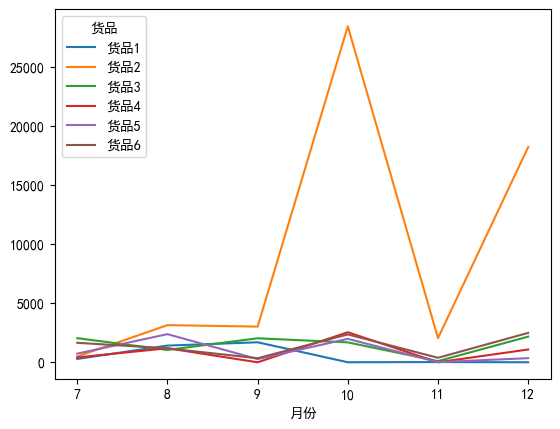

In [18]:
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack(fill_value=0) # unstack() 将月份设为行索引货物交货情况按时交货和晚交货设为列索引
data1.plot(kind='line') # 货品2在10月和12月销量猛增原因猜测有二1、公司加大营销力度，2、开发了新的市场

### b.不同区域

In [19]:
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack(fill_value=0)
data1
# 从销售区域看每种货品的销售区域为1-3个货品1有三个销售区域，货品2有2个销售区域其他货品销售区域都是一个

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,0.0,53811.0,0.0,0.0,0.0,0.0
华北,2827.0,0.0,9073.5,0.0,0.0,0.0
华南,579.0,0.0,0.0,0.0,0.0,0.0
泰国,0.0,0.0,0.0,0.0,5733.0,0.0
西北,11.0,0.0,0.0,5229.0,0.0,0.0
马来西亚,0.0,1510.0,0.0,0.0,0.0,8401.0


### c.月份和区域

In [20]:
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack(fill_value=0)
data1['货品2']
#货品2在10，12月份销量猛增，原因主要发生在原有销售区域(华东
#同样，分析出在7，8，9，11月份销售数量还有很大提升空间，可以适当加大营销力度

月份  销售区域
7   华东        489.0
    华北          0.0
    华南          0.0
    泰国          0.0
    西北          0.0
    马来西亚        2.0
8   华东       1640.0
    华北          0.0
    华南          0.0
    泰国          0.0
    西北          0.0
    马来西亚     1503.0
9   华东       3019.0
    华北          0.0
    华南          0.0
    泰国          0.0
    西北          0.0
    马来西亚        1.0
10  华东      28420.0
    华北          0.0
    泰国          0.0
    西北          0.0
    马来西亚        0.0
11  华东       2041.0
    华北          0.0
    华南          0.0
    泰国          0.0
    西北          0.0
    马来西亚        1.0
12  华东      18202.0
    华北          0.0
    华南          0.0
    泰国          0.0
    西北          0.0
    马来西亚        3.0
Name: 货品2, dtype: float64

### 3、商品是否存在质量问题

In [21]:
data['货品用户反馈'] = data['货品用户反馈'].str.strip() #去除首尾空格
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack(fill_value=0)
data1['拒货率'] = round(data1['拒货']/data1.sum(axis=1),2)
data1['合格率'] = round(data1['质量合格']/data1.sum(axis=1),2)
data1['返修率'] = round(data1['返修']/data1.sum(axis=1),2)

C:\Users\admin\AppData\Local\Temp\ipykernel_31372\1439624083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品用户反馈'] = data['货品用户反馈'].str.strip() #去除首尾空格


In [22]:
data1.sort_values(['合格率','返修率','拒货率'],ascending=False)

货品用户反馈    拒货  质量合格  返修   拒货率   合格率   返修率
货品  销售区域                                
货品3 华北    31   188  19  0.13  0.79  0.08
货品6 马来西亚  56   246  14  0.18  0.78  0.04
货品5 泰国    14   144  29  0.07  0.77  0.15
货品2 华东    72   184  51  0.23  0.60  0.17
货品1 华南     5     4   2  0.45  0.35  0.17
    西北     0     1   2  0.00  0.33  0.60
    华北     0     3  12  0.00  0.20  0.79
货品4 西北     0     9  49  0.00  0.16  0.84
货品2 马来西亚   6     1   3  0.60  0.09  0.28

In [23]:
#货品3.6.5合格率均较高，返修率比较低，说明质量还可以
#货品1.2.4合格率较低，返修率较高，质量存在一定的问题，需要改善
#货品2在马拉西亚的把货率最高，同时，在货品2在马拉西亚的按时交货率也非常低。猜测:马来西亚入对送货的时效性要求较高,如果达不到，则往往考虑拒货。
#考虑到货品2主要在华东地区销售量大，可以考虑增大在华东的投资，适当减少马来西亚的投入。

<Figure size 1000x600 with 0 Axes>

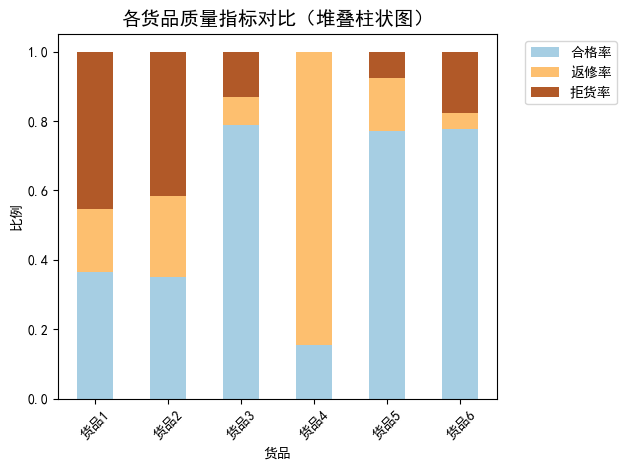

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 原始数据 (补充了按时交货率模拟数据)
data = {
    "货品": ["货品3", "货品6", "货品5", "货品2", "货品1", "货品4", "货品2"],
    "销售区域": ["华北", "马来西亚", "泰国", "华东", "华南", "西北", "马来西亚"],
    "拒货": [31, 56, 14, 72, 5, 0, 6],
    "质量合格": [188, 246, 144, 184, 4, 9, 1],
    "返修": [19, 14, 29, 51, 2, 49, 3],
    "按时交货率": [0.89, 0.75, 0.82, 0.60, 0.50, 0.24, 0.10]  # 模拟数据
}

df = pd.DataFrame(data)
df["总数量"] = df["拒货"] + df["质量合格"] + df["返修"]
df["拒货率"] = df["拒货"] / df["总数量"]
df["合格率"] = df["质量合格"] / df["总数量"]
df["返修率"] = df["返修"] / df["总数量"]

# --------------------------
# 1. 堆叠柱状图：各货品质量指标对比
# --------------------------
plt.figure(figsize=(10,6))
df_group = df.groupby("货品")[["合格率","返修率","拒货率"]].mean()
df_group.plot(kind="bar", stacked=True, colormap="Paired")
plt.title("各货品质量指标对比（堆叠柱状图）", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("比例")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 数据准备
data = {
    ('货品3', '华北'): [31, 188, 19, 0.13, 0.79, 0.08],
    ('货品6', '马来西亚'): [56, 246, 14, 0.18, 0.78, 0.04],
    ('货品5', '泰国'): [14, 144, 29, 0.07, 0.77, 0.15],
    ('货品2', '华东'): [72, 184, 51, 0.23, 0.60, 0.17],
    ('货品1', '华南'): [5, 4, 2, 0.45, 0.35, 0.17],
    ('货品1', '西北'): [0, 1, 2, 0.00, 0.33, 0.60],
    ('货品1', '华北'): [0, 3, 12, 0.00, 0.20, 0.79],
    ('货品4', '西北'): [0, 9, 49, 0.00, 0.16, 0.84],
    ('货品2', '马来西亚'): [6, 1, 3, 0.60, 0.09, 0.28]
}

df = pd.DataFrame.from_dict(data, orient='index', 
                           columns=['拒货', '质量合格', '返修', '拒货率', '合格率', '返修率'])
df.index = pd.MultiIndex.from_tuples(df.index, names=['货品', '销售区域'])
df = df.reset_index()

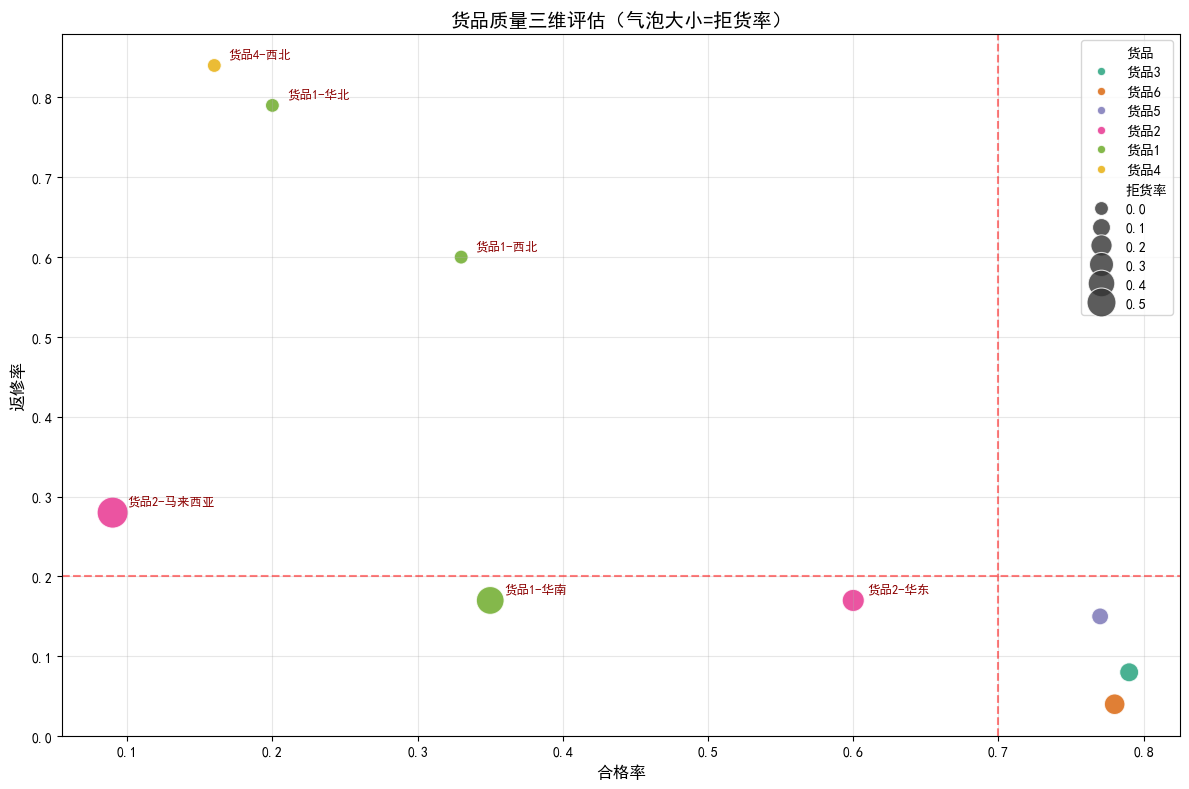

In [24]:
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 可视化1：质量三维评估气泡图
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='合格率', y='返修率', size='拒货率',
               hue='货品', sizes=(100, 500), palette='Dark2', alpha=0.8)

# 添加警戒线
plt.axhline(0.2, color='red', linestyle='--', alpha=0.5)
plt.axvline(0.7, color='red', linestyle='--', alpha=0.5)

# 标注异常点
anomaly_points = df[(df['合格率']<0.7) | (df['返修率']>0.2)]
for _, row in anomaly_points.iterrows():
    plt.text(row['合格率']+0.01, row['返修率']+0.01, 
             f"{row['货品']}-{row['销售区域']}", 
             fontsize=9, color='darkred')

plt.title("货品质量三维评估（气泡大小=拒货率）", fontsize=14)
plt.xlabel('合格率', fontsize=12)
plt.ylabel('返修率', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

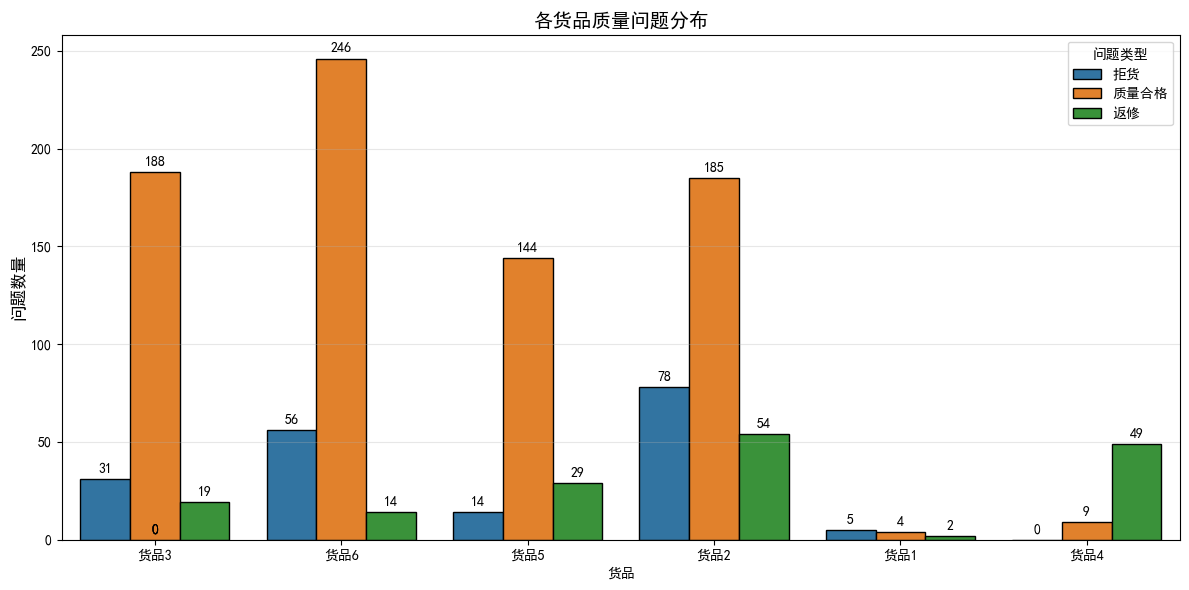

In [33]:
plt.figure(figsize=(12, 6))
df_melt = df.melt(id_vars=['货品', '销售区域'],
                  value_vars=['拒货', '质量合格', '返修'],
                  var_name='类型', value_name='数量')

sns.barplot(data=df_melt, x='货品', y='数量', hue='类型',
            errorbar=None,
            estimator=sum, 
            edgecolor='black')

# 添加每个柱子的数值标签
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.title("各货品质量问题分布", fontsize=14)
plt.ylabel('问题数量', fontsize=12)
plt.legend(title='问题类型')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

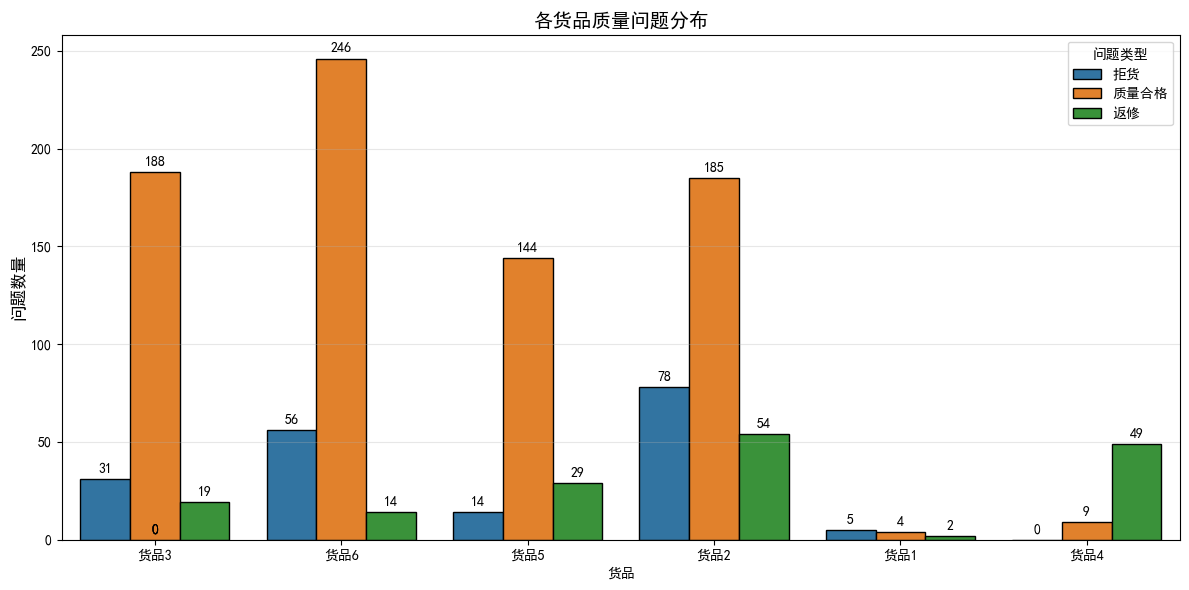

In [36]:
# 可视化2：质量问题堆叠柱状图
plt.figure(figsize=(12, 6))
df_melt = df.melt(id_vars=['货品','销售区域'], 
                  value_vars=['拒货', '质量合格', '返修'],
                  var_name='类型', value_name='数量')

sns.barplot(data=df_melt, x='货品', y='数量', hue='类型',
           errorbar=None,
           estimator=sum,
           edgecolor='black')

# # 添加总数标签
# totals = df_melt.groupby('货品')['数量'].sum()
# for i, total in enumerate(totals):
#     plt.text(i, total+50, f"{total}", ha='center', color='black')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
plt.title("各货品质量问题分布", fontsize=14)
plt.ylabel('问题数量', fontsize=12)
plt.legend(title='问题类型')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

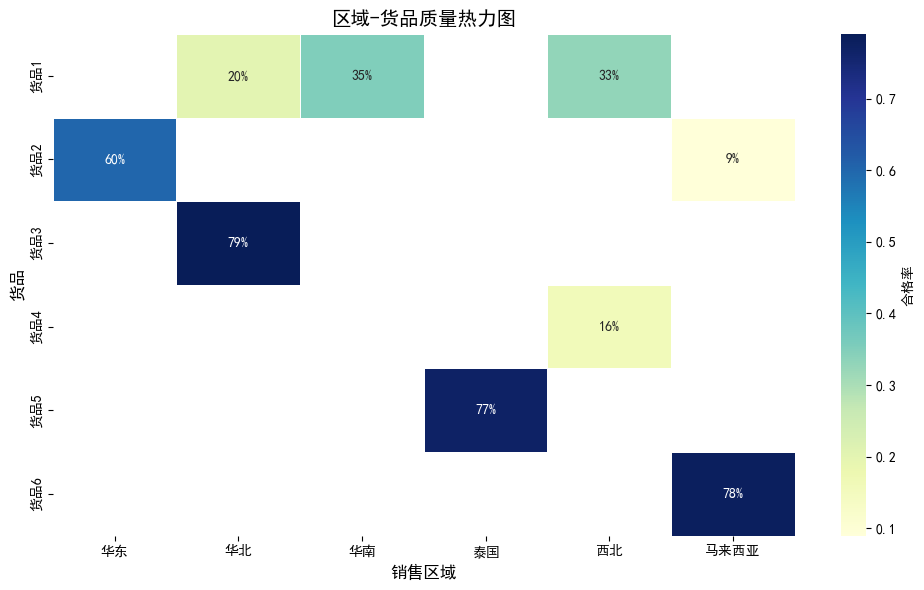

In [20]:
# 可视化3：区域质量热力图
pivot_df = df.pivot(index='销售区域', columns='货品', values='合格率')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df.T, annot=True, fmt=".0%", cmap='YlGnBu',
           linewidths=0.5, cbar_kws={'label': '合格率'})

plt.title("区域-货品质量热力图", fontsize=14)
plt.xlabel('销售区域', fontsize=12)
plt.ylabel('货品', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

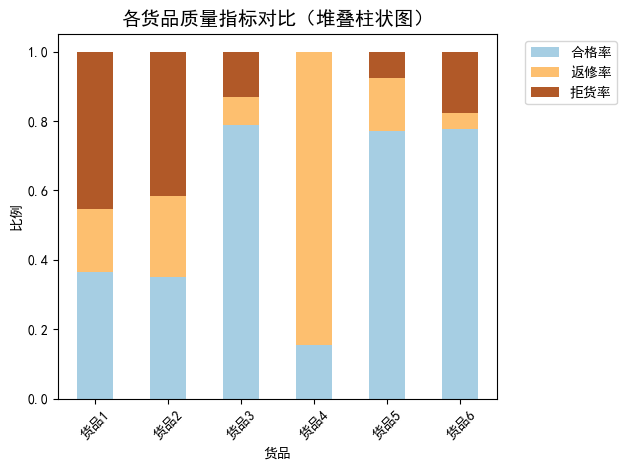

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 原始数据 (补充了按时交货率模拟数据)
data = {
    "货品": ["货品3", "货品6", "货品5", "货品2", "货品1", "货品4", "货品2"],
    "销售区域": ["华北", "马来西亚", "泰国", "华东", "华南", "西北", "马来西亚"],
    "拒货": [31, 56, 14, 72, 5, 0, 6],
    "质量合格": [188, 246, 144, 184, 4, 9, 1],
    "返修": [19, 14, 29, 51, 2, 49, 3],
    "按时交货率": [0.89, 0.75, 0.82, 0.60, 0.50, 0.24, 0.10]  # 模拟数据
}

df = pd.DataFrame(data)
df["总数量"] = df["拒货"] + df["质量合格"] + df["返修"]
df["拒货率"] = df["拒货"] / df["总数量"]
df["合格率"] = df["质量合格"] / df["总数量"]
df["返修率"] = df["返修"] / df["总数量"]

# --------------------------
# 1. 堆叠柱状图：各货品质量指标对比
# --------------------------
plt.figure(figsize=(10,6))
df_group = df.groupby("货品")[["合格率","返修率","拒货率"]].mean()
df_group.plot(kind="bar", stacked=True, colormap="Paired")
plt.title("各货品质量指标对比（堆叠柱状图）", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("比例")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

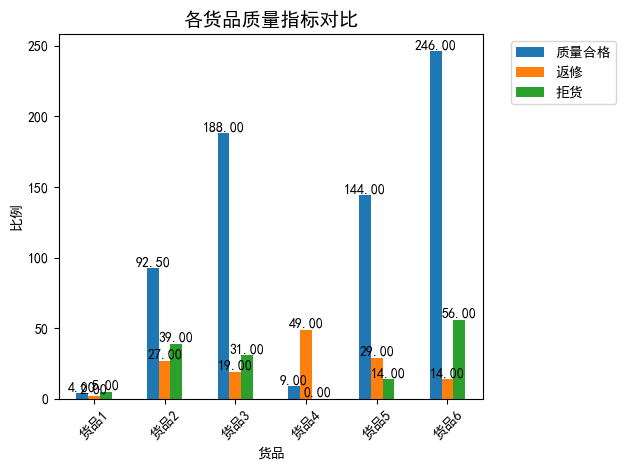

In [53]:
plt.figure(figsize=(10,6))
df_group = df.groupby("货品")[["质量合格", "返修", "拒货"]].mean()
ax = df_group.plot(kind="bar")

# 添加数值标签
for container in ax.containers:
    for index, rect in enumerate(container):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title("各货品质量指标对比", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("比例")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

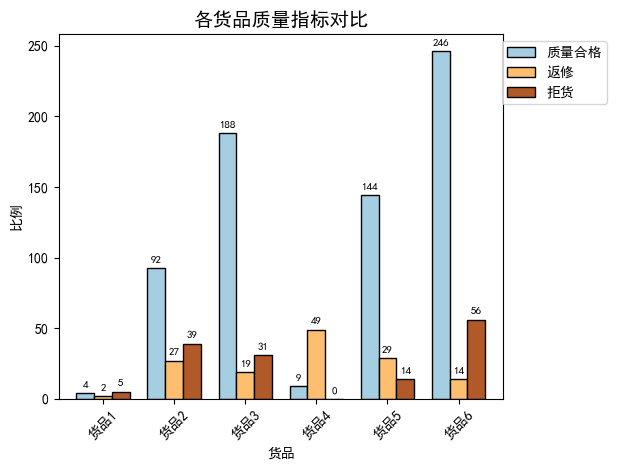

In [63]:
plt.figure(figsize=(20, 10))  # 加宽画布

ax = df_group.plot(
    kind="bar",
    width=0.75,  # 加粗柱子（范围0\~1，默认0.5）
    colormap="Paired", 
    edgecolor="black"
)

# 添加数值标签（适配新宽度）
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.0f",  # 显示2位小数
        label_type="edge",
        padding=3,   # 标签与柱子间距
        fontsize=8,
       
    )

plt.title("各货品质量指标对比", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("比例")
plt.legend(bbox_to_anchor=(1.25, 1))  # 图例右移避免遮挡
plt.tight_layout()  # 修正拼写错误
plt.show()


In [62]:
plt.close()